# Análise de progressão dos países integrantes da URSS após rompimento

Como a URSS era de caráter exclusivo à relações externas os dados a serem analisados referem-se ao ano de ruptura da união soviética e aos dias de hoje, a comparação tem como objetivo estudar o progresso a partir da ruptura desta organização referente a países que pertenceram ou não a ela.

# A hipótese

É esperado obter evidencia de avanços significativos quanto á democracia e renda per capita após a ruptura da união soviética , em seus paises membros. Os dados a serem analisados datam de 1991 , ano de ruptura da união soviética e baixo histórico da mesma, logo é esperado ver-se crescimento significativo nos paises uma vez que houve espaço para tal, também é esperado observar impactos na renda per capita e pib europeus em geral na época uma vez que apesar da organização não ter influencia direta nos indices de democracia nos paises não integrantes, certamente houve impacto quanto á economia européia com a existencia e queda da organização

# Mecanismo

Serão analisadas duas datas, o ano de 1991 e uma data recente, separando os paises contidos no dataframe em 3 grupos; Europa , URSS e resto do mundo, poderemos validar a hipótese, ou abate-la com base no comparativo obtido. A análise planejada consiste em : Um comparativo das médias anteriores e posteriores de democracia constatada em 1991 e posteriormente com intuito de evidenciar o esperado maior crescimento desta em países integrantes da URSS com relação aos que não à integravam, europeus;
um comparativo com relação ao desenvolvimento europeu após a ruptura da URSS comparado ao mundo, (medido a partir do pib per capita e renda per capita);

In [198]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [199]:
dados_gdp=pd.read_excel('gdppercapita.xlsx')#usd
renda=pd.read_excel('income.xlsx')#usd
democracia=pd.read_excel('democracia.xlsx')

In [200]:
dados_gdp.loc[:,"Europa"] = "Não"
dados_gdp.loc[:,"URSS"]="Não"

In [201]:
urss=dados_gdp.loc[(dados_gdp.country == 'Uzbekistan') | (dados_gdp.country == 'Ukraine') | (dados_gdp.country == 'Turkmenistan') | (dados_gdp.country == 'Tajikistan') | (dados_gdp.country == 'Russia') | (dados_gdp.country == 'Moldova') | (dados_gdp.country == 'Lithuania') | (dados_gdp.country == 'Kazakhstan') | (dados_gdp.country == 'Georgia') | (dados_gdp.country == 'Estonia') | (dados_gdp.country == 'Belarus')| (dados_gdp.country == 'Azerbaijan') | (dados_gdp.country == 'Armenia'), ['URSS']]='Sim'
europa1=dados_gdp.loc[(dados_gdp.country == 'Albania') | (dados_gdp.country == 'Andorra') | (dados_gdp.country == 'Belarus') | (dados_gdp.country == 'Bosnia and Herzegovina') | (dados_gdp.country == 'Iceland') | (dados_gdp.country == 'Liechtenstein') | (dados_gdp.country == 'Macedonia') | (dados_gdp.country == 'Moldova') | (dados_gdp.country == 'Monaco') | (dados_gdp.country == 'Montenegro') | (dados_gdp.country == 'Norway')| (dados_gdp.country == 'Russia') | (dados_gdp.country == 'San Marino') | (dados_gdp.country == 'Serbia') | (dados_gdp.country == 'Switzerland') | (dados_gdp.country == 'Turkey') | (dados_gdp.country == 'Ukraine') , ['Europa']]='Sim'
europa2=dados_gdp.loc[(dados_gdp.country == 'Austria') | (dados_gdp.country == 'Belgium')| (dados_gdp.country == 'Bulgaria')| (dados_gdp.country == 'Croatia')| (dados_gdp.country == 'Cyprus')| (dados_gdp.country == 'Czech Republic') | (dados_gdp.country == 'Denmark') | (dados_gdp.country == 'Estonia') | (dados_gdp.country == 'Finland') | (dados_gdp.country == 'France') | (dados_gdp.country == 'Germany') | (dados_gdp.country == 'Greece') | (dados_gdp.country == 'Hungary') | (dados_gdp.country == 'Ireland') | (dados_gdp.country == 'Italy') | (dados_gdp.country == 'Latvia') | (dados_gdp.country == 'Lithuania') | (dados_gdp.country == 'Luxembourg') | (dados_gdp.country == 'Malta') | (dados_gdp.country == 'Netherlands') | (dados_gdp.country == 'Poland') | (dados_gdp.country == 'Portugal') | (dados_gdp.country == 'Romania') | (dados_gdp.country == 'Slovak Republic') | (dados_gdp.country == 'Slovenia') | (dados_gdp.country == 'Spain') | (dados_gdp.country == 'Sweden') | (dados_gdp.country == 'United Kingdom'),['Europa']] = 'Sim'

In [202]:

renda=renda.set_index('country')
democracia=democracia.set_index('country')
dados_gdp=dados_gdp.set_index('country')


Separação dos dados urss

In [203]:
gdp_urss=dados_gdp.loc[dados_gdp.URSS=='Sim']

In [204]:
dados_gdp_1012=gdp_urss.loc[:,[1991,2011,'Europa','URSS']]
democracia_1012=democracia.loc[:,[1991,2011]]
renda_1012=renda.loc[:,[1991,2011]]

In [205]:
URSSdata=renda_1012.join(dados_gdp_1012, how='inner',lsuffix='_Renda/pc', rsuffix='_PIB/pc')
URSSdata2=democracia_1012.join(URSSdata, how='inner', lsuffix='_democracia', rsuffix='')
URSSdata2.head(30)


,1991,2011,1991_Renda/pc,2011_Renda/pc,1991_PIB/pc,2011_PIB/pc,Europa,URSS
country,,,,,,,,
Armenia,7.0,5.0,3340,7020,1600.0,3370.0,Não,Sim
Azerbaijan,-3.0,-7.0,8320,15800,3050.0,5770.0,Não,Sim
Belarus,7.0,-7.0,8250,17200,3060.0,6380.0,Sim,Sim
Estonia,6.0,9.0,13000,24500,NaN,15800.0,Sim,Sim
Georgia,4.0,6.0,6270,7320,2760.0,3220.0,Não,Sim
Kazakhstan,-3.0,-6.0,11500,21300,5210.0,9600.0,Não,Sim
Lithuania,10.0,10.0,14800,22900,NaN,13000.0,Sim,Sim
Moldova,5.0,8.0,5420,4180,NaN,1740.0,Sim,Sim
Russia,NaN,4.0,19600,24100,9030.0,11200.0,Sim,Sim


In [206]:
gdp_europa=dados_gdp.loc[(dados_gdp.Europa=='Sim')&(dados_gdp.URSS=='Não')]

In [207]:
dados_gdp_1013=gdp_europa.loc[:,[1991,2011,'Europa','URSS']]
democracia_1013=democracia.loc[:,[1991,2011]]
renda_1013=renda.loc[:,[1991,2011]]

In [208]:
EUROdata=renda_1013.join(dados_gdp_1013, how='inner',lsuffix='_Renda/pc', rsuffix='_PIB/pc')
EUROdata2=democracia_1013.join(EUROdata, how='inner', lsuffix='_democracia', rsuffix='')
EUROdata2.head(30)

,1991,2011,1991_Renda/pc,2011_Renda/pc,1991_PIB/pc,2011_PIB/pc,Europa,URSS
country,,,,,,,,
Albania,1.0,9.0,3230,10200,1380.0,4210.0,Sim,Não
Austria,10.0,10.0,32000,44200,34700.0,48100.0,Sim,Não
Belgium,10.0,8.0,31100,41200,33600.0,44600.0,Sim,Não
Bosnia and Herzegovina,-5.0,NaN,2440,9890,NaN,4700.0,Sim,Não
Bulgaria,8.0,9.0,8600,15700,3850.0,7020.0,Sim,Não
Croatia,-3.0,9.0,14100,20700,NaN,13900.0,Sim,Não
Cyprus,10.0,10.0,22900,33200,20800.0,30100.0,Sim,Não
Czech Republic,8.0,8.0,17700,28800,12400.0,20100.0,Sim,Não
Denmark,10.0,10.0,34200,44400,45100.0,58600.0,Sim,Não


# Análise 1: Índice Democrático

In [209]:
URSSdata2.describe()

,1991,2011,1991_Renda/pc,2011_Renda/pc,1991_PIB/pc,2011_PIB/pc
count,12.000000,13.000000,13.000000,13.000000,10.000000,13.000000
mean,1.666667,0.538462,8774.615385,13113.846154,3390.200000,6188.846154
std,6.358006,7.411875,4927.755769,8206.654351,2352.835726,4784.779755
min,-9.000000,-9.000000,2990.000000,2210.000000,972.000000,775.000000
25%,-3.000000,-7.000000,5420.000000,7020.000000,1890.000000,3140.000000
50%,4.500000,4.000000,8250.000000,11200.000000,3055.000000,5010.000000
75%,6.250000,6.000000,11500.000000,21300.000000,3575.000000,9600.000000
max,10.000000,10.000000,19600.000000,24500.000000,9030.000000,15800.000000


In [210]:
EUROdata2.describe()

,1991,2011,1991_Renda/pc,2011_Renda/pc,1991_PIB/pc,2011_PIB/pc
count,31.000000,30.000000,31.000000,31.000000,24.000000,31.000000
mean,7.290323,9.500000,21696.451613,31151.290323,25712.916667,30464.193548
std,4.981255,0.731083,11116.205152,13455.088936,16821.375759,21673.840880
min,-5.000000,8.000000,2440.000000,9890.000000,1380.000000,4210.000000
25%,8.000000,9.000000,13100.000000,20250.000000,11512.500000,12750.000000
50%,10.000000,10.000000,21100.000000,28800.000000,26150.000000,24500.000000
75%,10.000000,10.000000,30750.000000,41950.000000,33950.000000,45900.000000
max,10.000000,10.000000,46700.000000,62100.000000,63000.000000,87500.000000


(-10, 10)

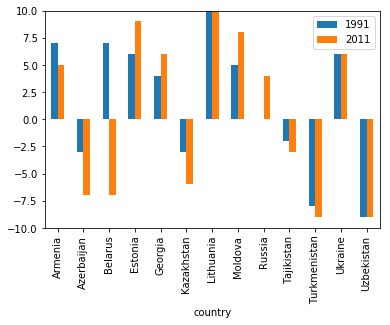

In [211]:
democraciaj=URSSdata2.loc[:,[1991,2011]]
democraciaj.plot.bar()
plt.ylim(-10,10)

In [212]:
democraciaj.mean()

1991    1.666667
2011    0.538462
dtype: float64

(-10, 10)

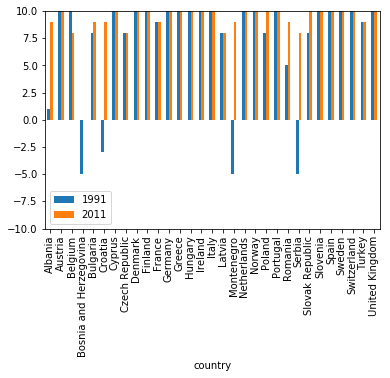

In [213]:
democraciae=EUROdata2.loc[:,[1991,2011]]
democraciae.plot.bar()
plt.ylim(-10,10)

In [214]:
democraciae.mean()

1991    7.290323
2011    9.500000
dtype: float64

A partir da analise destes dados obtemos uma conclusão diferente da esperada, não encontramos uma grande alteração positiva no indice de democracia como esperado nem mesmo um padrão, porém é possivel a partir dos dados coletados notar que proporcionalmente o número de países em que os índices democráticos são negativos a porcentagem é muito maior no caso dos paises ex-URSS, indicando uma resistência à reversão da situação em que estavam mediante à queda da organização. Vale notar que os mesmos foram excluidos do gráfico europeu para uma comparação mais clara.

# Análise 2

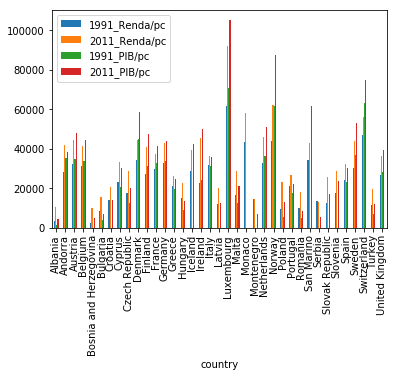

In [215]:
EUROdata.plot.bar()

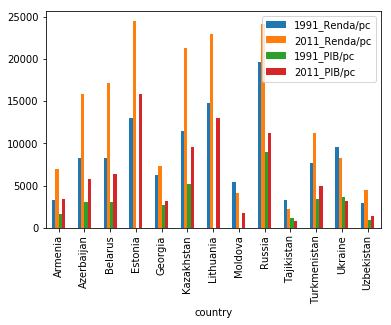

In [216]:
URSSdata.plot.bar()

Já que a análise feita pelos gráficos é incompreensivel e portanto inconclusiva neste caso, é utilizado como base para a análise a função describe

In [218]:
EUROdata.describe()

,1991_Renda/pc,2011_Renda/pc,1991_PIB/pc,2011_PIB/pc
count,37.000000,37.000000,27.000000,36.000000
mean,23932.162162,34297.027027,27241.111111,33691.388889
std,12773.775900,16524.827931,18332.377901,24216.418533
min,2440.000000,9890.000000,1380.000000,4210.000000
25%,14100.000000,22700.000000,12400.000000,13275.000000
50%,22900.000000,33200.000000,28300.000000,30200.000000
75%,31600.000000,43100.000000,35000.000000,47425.000000
max,61800.000000,92000.000000,70700.000000,105000.000000


In [219]:
URSSdata.describe()

,1991_Renda/pc,2011_Renda/pc,1991_PIB/pc,2011_PIB/pc
count,13.000000,13.000000,10.000000,13.000000
mean,8774.615385,13113.846154,3390.200000,6188.846154
std,4927.755769,8206.654351,2352.835726,4784.779755
min,2990.000000,2210.000000,972.000000,775.000000
25%,5420.000000,7020.000000,1890.000000,3140.000000
50%,8250.000000,11200.000000,3055.000000,5010.000000
75%,11500.000000,21300.000000,3575.000000,9600.000000
max,19600.000000,24500.000000,9030.000000,15800.000000


Com um salto de quase 50% de crescimento em renda per capita nos anos analisados, vemos que não somente os países ex integrantes da URSS demonstram crescimento significativo na europa no período analisado, ainda que os dados não sejam conclusivos no que se refere á causa do crescimento e que saibamos que existem milhares de outros fatores impactando os números coletados como própriamente o desenvolvimento tecnológico considerando os 20 anos de diferença entre as coletas, é demonstrado que existiu um crescimento significativo pela europa inteira e que o período que seguiu a união soviética foi próspero para o continente.